In [1]:
import numpy as np # mathematical manipulations
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt  # plotting
import seaborn as sns  # advanced data visualization
from statistics import variance, stdev # deprecated, use np.var and np.std
from sklearn.preprocessing import StandardScaler, LabelEncoder # data preprocessing
from sklearn.preprocessing import MinMaxScaler, LabelEncoder  # potential alternative scaling
from scipy.stats import zscore, boxcox # outlier treatment
from sklearn.ensemble import RandomForestClassifier #provides built-in feature importance scores


import warnings
warnings.filterwarnings("ignore") # suppress warnings

# Machine Learning
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, roc_auc_score

# chose model
from sklearn.linear_model import LogisticRegression

In [2]:
# loading the dataset
df = pd.read_csv("loan_data.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,LP002953,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
377,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
378,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
379,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y


In [3]:
# Display the first few rows
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [4]:
# Display the last two rows
df.tail(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
379,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
380,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [5]:
# Get the number of rows and columns
df.shape

(381, 13)

In [6]:
# Get information about data types and non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


In [7]:
# Get summary statistics for numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,381.0,3579.845144,1419.813818,150.0,2600.0,3333.0,4288.0,9703.0
CoapplicantIncome,381.0,1277.275381,2340.818114,0.0,0.0,983.0,2016.0,33837.0
LoanAmount,381.0,104.986877,28.358464,9.0,90.0,110.0,127.0,150.0
Loan_Amount_Term,370.0,340.864865,68.549257,12.0,360.0,360.0,360.0,480.0
Credit_History,351.0,0.837607,0.369338,0.0,1.0,1.0,1.0,1.0


In [8]:
# Get summary statistics for categorical columns
df.describe(include = 'object').T

,count,unique,top,freq
Loan_ID,381,381,LP001003,1
Gender,376,2,Male,291
Married,381,2,Yes,228
Dependents,373,4,0,234
Education,381,2,Graduate,278
Self_Employed,360,2,No,325
Property_Area,381,3,Semiurban,149
Loan_Status,381,2,Y,271


In [9]:
# List column names
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [10]:
# Check for duplicate rows
df.duplicated().sum()

0

In [11]:
# Select numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns
numerical_columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [12]:
# select categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [13]:
# Check for missing values in DataFrame
df.isnull().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [14]:
# check for missing numerical values in the dataframe
missing_values = df[numerical_columns].isnull().sum()
print("Missing values in numerical columns:\n", missing_values)

Missing values in numerical columns:
 ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
dtype: int64


In [15]:
# check missing values in categorical columns
missing_values = df[categorical_columns].isnull().sum()
print("Missing values in numerical columns:\n", missing_values)

Missing values in numerical columns:
 Loan_ID           0
Gender            5
Married           0
Dependents        8
Education         0
Self_Employed    21
Property_Area     0
Loan_Status       0
dtype: int64


### Handling Missing Values:

In [16]:
warnings.filterwarnings('ignore')

# Fill missing values in numerical columns using forward fill
for column in numerical_columns:
    df[column].fillna(df[column].median(), inplace=True)
    
# Check if there are any remaining missing values
print("Remaining missing values:\n", df.isnull().sum())

Remaining missing values:
 Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64


In [17]:
warnings.filterwarnings('ignore')

# filling missing values in categorical columns
for col in categorical_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)
    
# Check if there are any remaining missing values
print("Remaining missing values:\n", df.isnull().sum())

Remaining missing values:
 Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


### Univariate Analysis--Creates frequency tables to understand the distribution of values within each categorical column.

In [18]:
df['Property_Area'].value_counts()

Property_Area
Semiurban    149
Urban        126
Rural        106
Name: count, dtype: int64

In [19]:
df['Education'].value_counts()

Education
Graduate        278
Not Graduate    103
Name: count, dtype: int64

In [20]:
df['Dependents'].value_counts()

Dependents
0     242
2      59
1      52
3+     28
Name: count, dtype: int64

3+ makes Dependants column an object datatype

### Dependent Variable--Loan Status (For prediction)

In [21]:
df['Loan_Status'].value_counts()

Loan_Status
Y    271
N    110
Name: count, dtype: int64

### Outlier Detection and Transformation

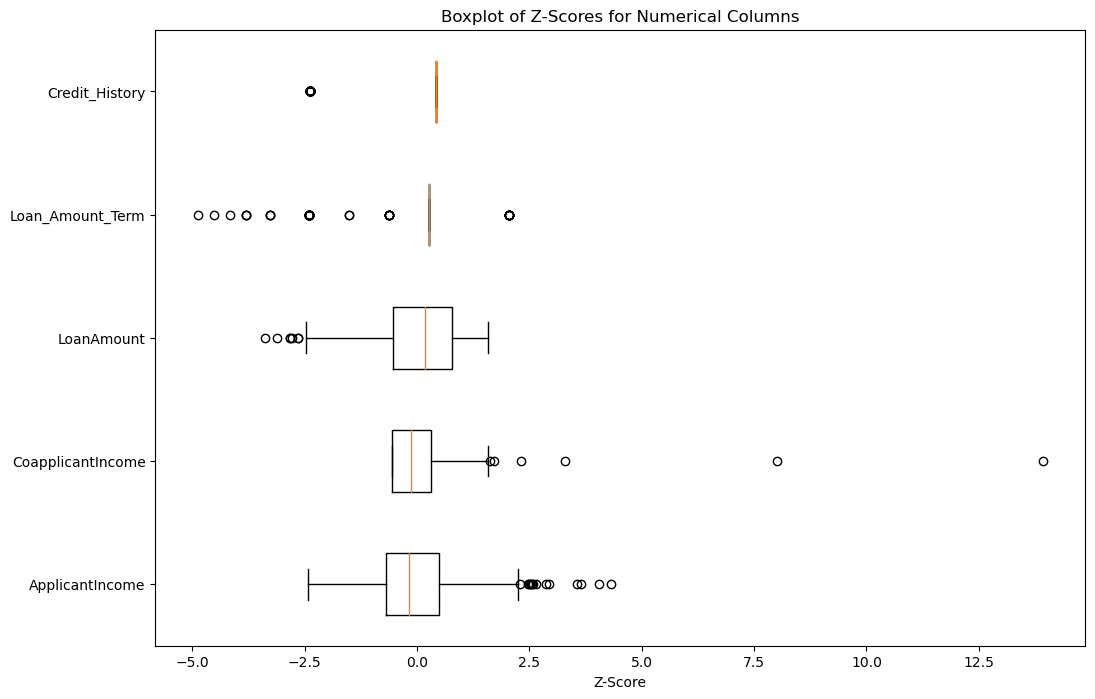

In [22]:
# outlier detection
z_scores = zscore(df[numerical_columns])

z_scores_df = pd.DataFrame(z_scores, columns=numerical_columns)

plt.figure(figsize=(12, 8))
plt.boxplot(z_scores_df.values, labels=numerical_columns, vert=False)
plt.title('Boxplot of Z-Scores for Numerical Columns')
plt.xlabel('Z-Score')
plt.show()

In [23]:
# Define a function to remove outliers using Box-Cox transformation
def remove_outliers_boxcox(data):
    # Added a small constant to handle zero and negative values--close to one
    data = data - data.min() + 1e-6
    transformed_data, _ = boxcox(data)
    return transformed_data

# Apply Box-Cox transformation to numerical columns
transformed_numerical_columns = df[numerical_columns].apply(remove_outliers_boxcox)
transformed_numerical_columns

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,143.013532,7.933478,709.497115,754472.730643,9.999997e-07
1,113.607255,-11.932248,243.245089,754472.730643,9.999997e-07
2,104.596229,8.460235,641.248899,754472.730643,9.999997e-07
3,165.189718,-11.932248,824.858959,754472.730643,9.999997e-07
4,98.829396,7.939682,442.509258,754472.730643,9.999997e-07
...,...,...,...,...,...
376,160.779591,-11.932248,709.497115,754472.730643,9.999997e-07
377,118.342955,8.235741,543.007232,754472.730643,9.999997e-07
378,111.508273,-11.932248,274.916315,754472.730643,9.999997e-07
379,134.786576,-11.932248,100.062806,125152.506683,9.999997e-07


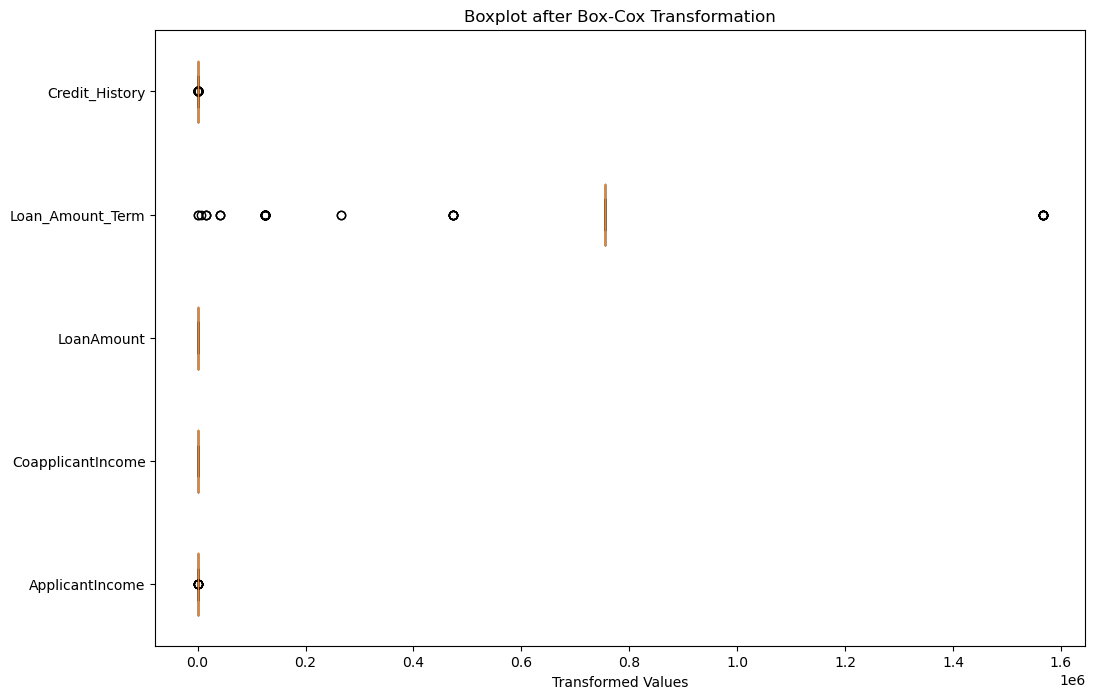

In [24]:
# Plot boxplots of the transformed columns
plt.figure(figsize=(12, 8))
plt.boxplot(transformed_numerical_columns.values, labels=numerical_columns, vert=False)
plt.title('Boxplot after Box-Cox Transformation')
plt.xlabel('Transformed Values')
plt.show()

In [53]:

def detect_outliers_iqr(df):
    # Calculate the first and third quartiles
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    
    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1
    
    # Define the lower and upper bounds for outliers detection
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Find outliers
    outliers = (df < lower_bound) | (df > upper_bound)
    
    return outliers

outliers = df[numerical_columns].apply(detect_outliers_iqr)
outliers.sum()


ApplicantIncome      14
CoapplicantIncome     6
LoanAmount            7
Loan_Amount_Term     58
Credit_History       57
dtype: int64

### --Data Visualization--Plots

Text(0.5, 1.0, 'A plot showing the distribution of the loan amount term')

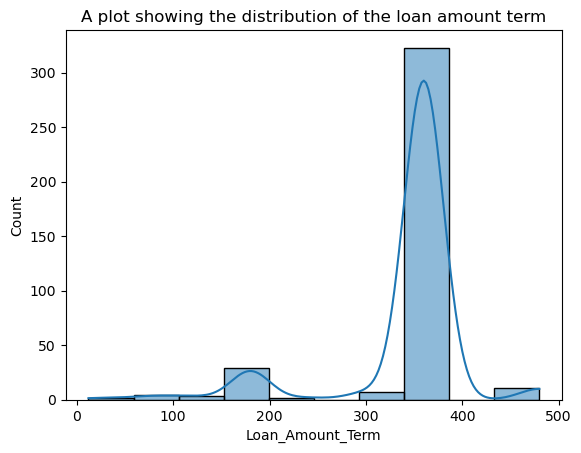

In [25]:
sns.histplot(df, x = 'Loan_Amount_Term', kde = True)
plt.title('A plot showing the distribution of the loan amount term')

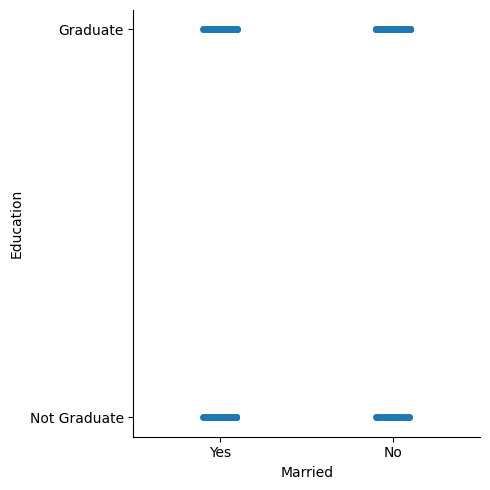

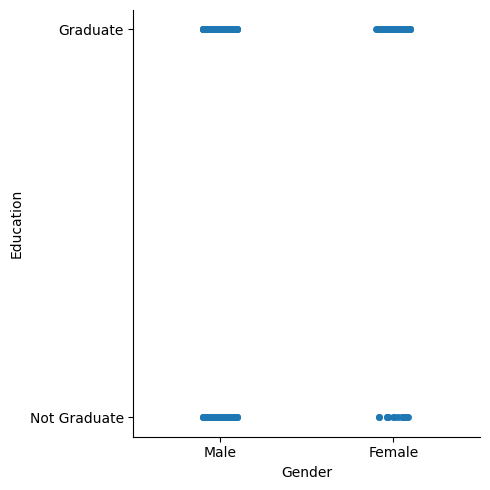

In [26]:
sns.catplot(x="Married", y="Education", data = df)
sns.catplot(x="Gender", y="Education", data = df)

### Categorical Variable Encoding

In [27]:
# encode categorical variables
df['Gender'] =  LabelEncoder().fit_transform(df['Gender'])
df['Gender'].head()

0    1
1    1
2    1
3    1
4    1
Name: Gender, dtype: int32

In [28]:
df['Property_Area'] = LabelEncoder().fit_transform(df['Property_Area'])
df['Property_Area'].head(15)

0     0
1     2
2     2
3     2
4     2
5     2
6     2
7     0
8     2
9     2
10    2
11    2
12    0
13    2
14    2
Name: Property_Area, dtype: int32

In [29]:
df['Education'] =  LabelEncoder().fit_transform(df['Education'])
df['Education'].head(15)

0     0
1     0
2     1
3     0
4     1
5     0
6     0
7     0
8     0
9     0
10    1
11    0
12    1
13    0
14    1
Name: Education, dtype: int32

In [30]:
df['Married'] =  LabelEncoder().fit_transform(df['Married'])
df['Married'].head(15)

0     1
1     1
2     1
3     0
4     1
5     1
6     1
7     0
8     1
9     0
10    0
11    0
12    1
13    1
14    1
Name: Married, dtype: int32

In [31]:
df['Self_Employed'] =  LabelEncoder().fit_transform(df['Self_Employed'])
df['Self_Employed'].head(15)

0     0
1     1
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
Name: Self_Employed, dtype: int32

In [32]:
df['Loan_Status'] = LabelEncoder().fit_transform(df['Loan_Status'])
df['Loan_Status'].head(5)

0    0
1    1
2    1
3    1
4    1
Name: Loan_Status, dtype: int32

In [33]:
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
1,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
2,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
3,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
4,LP001013,1,1,0,1,0,2333,1516.0,95.0,360.0,1.0,2,1


### Performing one-hot encoding on the Dependents column. 

In [34]:
#Getting dummy variable of the dependent column
dummys = pd.get_dummies(df['Dependents'], prefix = 'Dependents',drop_first = True)
dummys = dummys.astype(int)
dummys

,Dependents_1,Dependents_2,Dependents_3+
0,1,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
376,0,0,1
377,0,0,0
378,0,0,0
379,0,0,1


In [35]:
# --The first value is dropped by default to avoid multicollinearity.
df.drop(['Loan_ID', 'Dependents'],axis = 1, inplace = True)

In [36]:
df.head(10)

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
1,1,1,0,1,3000,0.0,66.0,360.0,1.0,2,1
2,1,1,1,0,2583,2358.0,120.0,360.0,1.0,2,1
3,1,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
4,1,1,1,0,2333,1516.0,95.0,360.0,1.0,2,1
5,1,1,0,0,3200,700.0,70.0,360.0,1.0,2,1
6,1,1,0,0,2500,1840.0,109.0,360.0,1.0,2,1
7,1,0,0,0,1853,2840.0,114.0,360.0,1.0,0,0
8,1,1,0,0,1299,1086.0,17.0,120.0,1.0,2,1
9,1,0,0,0,4950,0.0,125.0,360.0,1.0,2,1


In [37]:
df_full = pd.concat([df,dummys.astype(int)],axis = 1)
df_full.head(10)

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Dependents_1,Dependents_2,Dependents_3+
0,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0,1,0,0
1,1,1,0,1,3000,0.0,66.0,360.0,1.0,2,1,0,0,0
2,1,1,1,0,2583,2358.0,120.0,360.0,1.0,2,1,0,0,0
3,1,0,0,0,6000,0.0,141.0,360.0,1.0,2,1,0,0,0
4,1,1,1,0,2333,1516.0,95.0,360.0,1.0,2,1,0,0,0
5,1,1,0,0,3200,700.0,70.0,360.0,1.0,2,1,0,1,0
6,1,1,0,0,2500,1840.0,109.0,360.0,1.0,2,1,0,1,0
7,1,0,0,0,1853,2840.0,114.0,360.0,1.0,0,0,0,0,0
8,1,1,0,0,1299,1086.0,17.0,120.0,1.0,2,1,0,1,0
9,1,0,0,0,4950,0.0,125.0,360.0,1.0,2,1,0,0,0


## Splitting Data

In [38]:
#Seperating dependents and independent variables
X = df_full.drop(['Loan_Status'], axis = 1)
y = df_full.pop('Loan_Status') 

In [39]:
X.shape

(381, 13)

In [40]:
y.shape

(381,)

In [41]:
# X is the condition
X.head()


,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Dependents_1,Dependents_2,Dependents_3+
0,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,1,0,0
1,1,1,0,1,3000,0.0,66.0,360.0,1.0,2,0,0,0
2,1,1,1,0,2583,2358.0,120.0,360.0,1.0,2,0,0,0
3,1,0,0,0,6000,0.0,141.0,360.0,1.0,2,0,0,0
4,1,1,1,0,2333,1516.0,95.0,360.0,1.0,2,0,0,0


In [42]:
#Y is the prediction target
y.head(10)

0    0
1    1
2    1
3    1
4    1
5    1
6    1
7    0
8    1
9    1
Name: Loan_Status, dtype: int32

### Feature Scaling

In [43]:
#Scaling the dataset
scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
scaled_data.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Dependents_1,Dependents_2,Dependents_3+
0,0.535875,0.819178,-0.608690,-0.318050,0.707469,0.098695,0.812575,0.275147,0.419435,-1.351832,2.515338,-0.428054,-0.281638
1,0.535875,0.819178,-0.608690,3.144156,-0.408932,-0.546371,-1.376596,0.275147,0.419435,1.216986,-0.397561,-0.428054,-0.281638
2,0.535875,0.819178,1.642872,-0.318050,-0.703019,0.462294,0.530102,0.275147,0.419435,1.216986,-0.397561,-0.428054,-0.281638
3,0.535875,-1.220736,-0.608690,-0.318050,1.706799,-0.546371,1.271595,0.275147,0.419435,1.216986,-0.397561,-0.428054,-0.281638
4,0.535875,0.819178,1.642872,-0.318050,-0.879330,0.102118,-0.352629,0.275147,0.419435,1.216986,-0.397561,-0.428054,-0.281638


### Feature Importance Analysis --- Random Forest Classifier

In [44]:
model = RandomForestClassifier()
model.fit(scaled_data, y)

RandomForestClassifier()

In [45]:
# extract feature importances
feature_importances = model.feature_importances_
feature_names = scaled_data.columns

# Sort features and importances in descending order
sorted_idx = feature_importances.argsort()[::-1]
sorted_features = feature_names[sorted_idx]
sorted_importances = feature_importances[sorted_idx]


In [46]:
# Print the top 10 most important features
print("Top 10 most important features:")
for i, (feature, importance) in enumerate(zip(sorted_features[:10], sorted_importances[:10])):
    print(f"{i+1}. {feature}: {importance:.4f}")

Top 10 most important features:
1. Credit_History: 0.3012
2. ApplicantIncome: 0.1922
3. LoanAmount: 0.1675
4. CoapplicantIncome: 0.1036
5. Property_Area: 0.0539
6. Loan_Amount_Term: 0.0481
7. Education: 0.0267
8. Married: 0.0254
9. Gender: 0.0215
10. Dependents_1: 0.0194


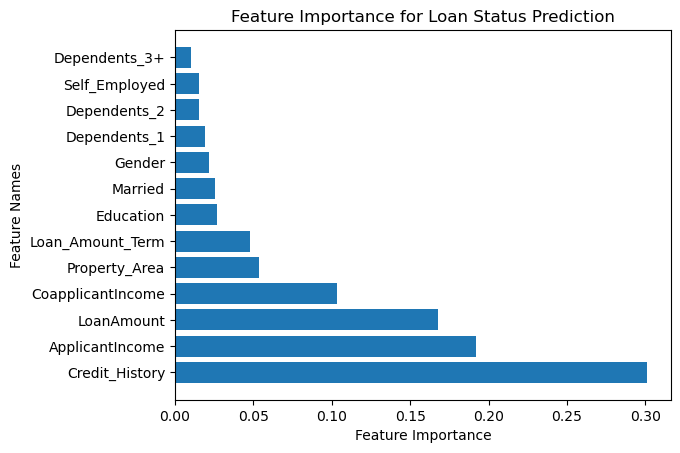

In [47]:
# Visualization (using matplotlib)
plt.barh(sorted_features, sorted_importances)
plt.xlabel("Feature Importance")
plt.ylabel("Feature Names")
plt.title("Feature Importance for Loan Status Prediction")
plt.show()

In [48]:
# Split data into training and testing sets (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(scaled_data, y, test_size=0.2, random_state=42)

In [49]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((304, 13), (304,), (77, 13), (77,))

In [50]:
# Define a stratified splitter
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

In [51]:
# Function to train and evaluate models
def train_and_evaluate_model(model_name, model):
    print(f"\n**Evaluating {model_name} Model:**")
    for train_index, test_index in sss.split(scaled_data, y):
        X_train, X_test = scaled_data.iloc[train_index], scaled_data.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        print(f"- Accuracy: {accuracy_score(y_test, y_pred):.4f}")
        print(f"- F1 Score: {f1_score(y_test, y_pred):.4f}")
        print(f"- Precision: {precision_score(y_test, y_pred):.4f}")
        print(f"- Recall: {recall_score(y_test, y_pred):.4f}")
        print(f"- Confusion Matrix:\n {confusion_matrix(y_test, y_pred)}")
        print(f"- ROC AUC Score: {roc_auc_score(y_test, y_pred):.4f}\n")

In [52]:
# Experiment with logistic regression model
train_and_evaluate_model("Logistic Regression", LogisticRegression())


**Evaluating Logistic Regression Model:**
- Accuracy: 0.8571
- F1 Score: 0.9091
- Precision: 0.8333
- Recall: 1.0000
- Confusion Matrix:
 [[11 11]
 [ 0 55]]
- ROC AUC Score: 0.7500

- Accuracy: 0.9091
- F1 Score: 0.9402
- Precision: 0.8871
- Recall: 1.0000
- Confusion Matrix:
 [[15  7]
 [ 0 55]]
- ROC AUC Score: 0.8409

- Accuracy: 0.8571
- F1 Score: 0.9091
- Precision: 0.8333
- Recall: 1.0000
- Confusion Matrix:
 [[11 11]
 [ 0 55]]
- ROC AUC Score: 0.7500

- Accuracy: 0.8312
- F1 Score: 0.8943
- Precision: 0.8088
- Recall: 1.0000
- Confusion Matrix:
 [[ 9 13]
 [ 0 55]]
- ROC AUC Score: 0.7045

- Accuracy: 0.8442
- F1 Score: 0.9000
- Precision: 0.8308
- Recall: 0.9818
- Confusion Matrix:
 [[11 11]
 [ 1 54]]
- ROC AUC Score: 0.7409

